In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
from utils import load_data_voc
from yolo import *
from torch import nn
import torchvision

In [2]:
train_iter, test_iter, test_iter_raw = load_data_voc(batch_size=16)
# train_iter, test_iter, test_iter_raw = load_data_voc(batch_size=16, download=True)

In [3]:
resnet18 = torchvision.models.resnet18(weights=None)
backbone = nn.Sequential(*list(resnet18.children())[:-2]) # remove avg pool and fc
net = Yolo(backbone, backbone_out_channels=512)

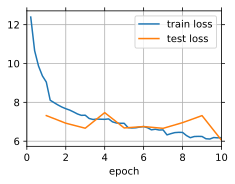

In [4]:
def lr(epoch):
    if epoch < 10: return 0.001 * (epoch + 1)
    if epoch < 85: return 0.01
    if epoch < 115: return 0.001
    if epoch < 145: return 0.0001

train(net, train_iter, test_iter, 10, lr=lr, momentum=0.9, weight_decay=5e-4, accum_batch_num=4, save_path='./model', pretrained=False,
      save_every=2)
# train(net, train_iter, test_iter, 145, lr=lr, momentum=0.9, weight_decay=5e-4, accum_batch_num=4, save_path='./model', pretrained=False)